# Dados obtidos em www.simcosta.furg.br

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

In [2]:
# PROBLEMA ATUAL -> COISA DOS 7 DIAS
# PARAR POR AGORA PRA AUMENTAR A CPU

In [2]:
def passa_data(data):
    return datetime.strptime(data, '%Y %m %d %H %M %S')

In [60]:
def teste_serie_temporal(df, delta_time = 24*7):
    counter = 0
    falhas = []
    for i in range(len(df.index)):
        if df.index[i] > df.index[i-1] + timedelta(hours=delta_time):
            falhas.append((df.index[i-1], df.index[i]))
#             print('Inicio da falha temporal: ' + str(df.index[i-1]))
#             print('Fim da falha na serie temporal ' + str(df.index[i]))
            counter += 1
    print('Foram encontradas ' + str(counter) +' falhas na serie temporal.')
    return falhas

In [62]:
a = teste_serie_temporal(dado)

Foram encontradas 3 falhas na série temporal.


In [63]:
a

[(Timestamp('2017-08-25 23:55:00'), Timestamp('2018-01-30 06:25:00')),
 (Timestamp('2018-09-02 21:23:00'), Timestamp('2018-10-24 11:23:00')),
 (Timestamp('2019-09-12 10:53:00'), Timestamp('2020-12-17 21:51:40'))]

In [34]:
# limiar de HS eh de 20m
# res HS = 0.01 -> acho que vou aproximar pra uma casa decimal so, fica mais facil de cortar dados espurios
# e talvez fique melhor discretizado

# se ficar mais de um dia sem dado, eu caracterizo como um GAP e "recorto" a serie temporal
# 24h - 1 ponto por h - 24 pontos

# WMO define um desvpad de 4* a media, entao vou usar esse cara aqui tbm
dado = pd.read_csv(data_path + '/' + os.listdir(data_path)[0])

Ano = dado['YEAR'].apply(str)
Mes = dado['MONTH'].apply(str)
Dia = dado['DAY'].apply(str)
Hora = dado['HOUR'].apply(str)
Minuto = dado['MINUTE'].apply(str)
Segundo = dado['SECOND'].apply(str)

dado['DATA'] = (Ano + ' ' + Mes + ' ' + Dia + ' ' + Hora + ' ' + Minuto + ' ' + Segundo).apply(passa_data)
dado = dado.set_index('DATA')
del(dado['YEAR'])
del(dado['MONTH'])
del(dado['DAY'])
del(dado['HOUR'])
del(dado['MINUTE'])
del(dado['SECOND'])

In [20]:
dados_nan = dado.isnull().where(dado['Hsig'].isnull() == True).dropna() # me da um DF com as datas de nan

In [46]:
# n acredito que era so isso hahahahahahaahahasdhfasdhfasdfkabsdfjahsdvcfasjhdkfvasdlufasdiflv
for i in range(len(dado.index)):
    if dado.index[i] > dado.index[i-1] + timedelta(hours = 24*7): # procurando buracos de uma semana no meu DF
        print('Inicio do buraco:' + str(dado.index[i-1]))
        print('Fim do Buraco: ' + str(dado.index[i]))

Inicio do buraco:2017-08-25 23:55:00
Fim do Buraco: 2018-01-30 06:25:00
Inicio do buraco:2018-09-02 21:23:00
Fim do Buraco: 2018-10-24 11:23:00
Inicio do buraco:2019-09-12 10:53:00
Fim do Buraco: 2020-12-17 21:51:40


In [47]:
# conta os buracos de Nan, provavelmente isso vai morrer
counter = 0
for i in range(len(dados_nan.index)):
    if dados_nan.index[i] == dados_nan.index[i-1] + timedelta(hours = 24*7):
        if counter == 48:
            print('Data inicial: ' + str(dados_nan.index[i]))
        counter += 1 # se o valor eh meia hora depois, comeco a contar
    else:
        if counter>=48:
            print('Data Final: ' + str(dados_nan.index[i]))
        counter = 0
    
        

Text(0.5, 1.0, 'Sem tratamento de dados')

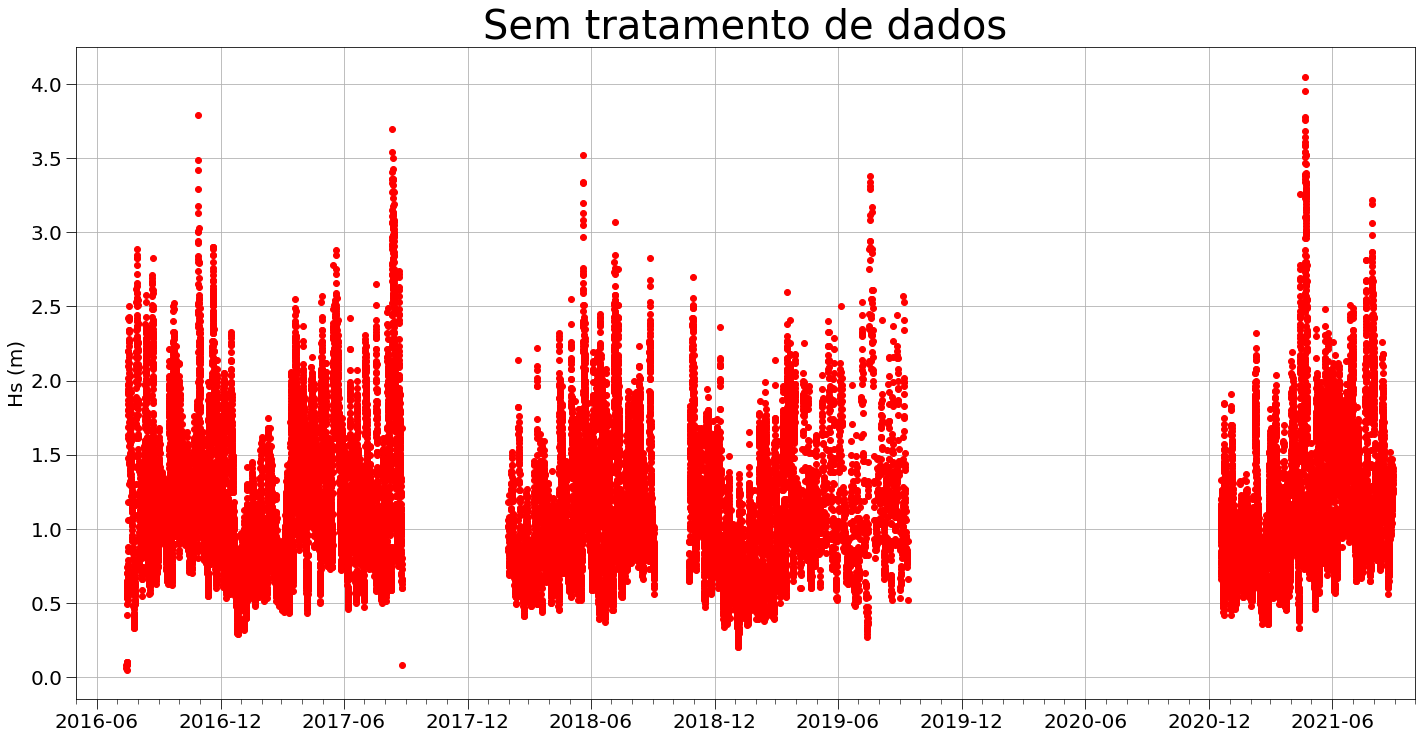

In [44]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'], marker = 'o', color = 'r', linestyle = 'none')
ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('Sem tratamento de dados', fontsize = 40)

In [102]:
cut

[(Timestamp('2017-08-25 20:25:00'), Timestamp('2019-01-09 20:53:00')),
 (Timestamp('2019-03-22 04:23:02'), Timestamp('2021-08-29 15:21:40')),
 (Timestamp('2021-08-29 16:51:40'), Timestamp('2021-08-30 10:51:40'))]

Text(0.5, 1.0, 'Sem tratamento de dados - mais discretizado')

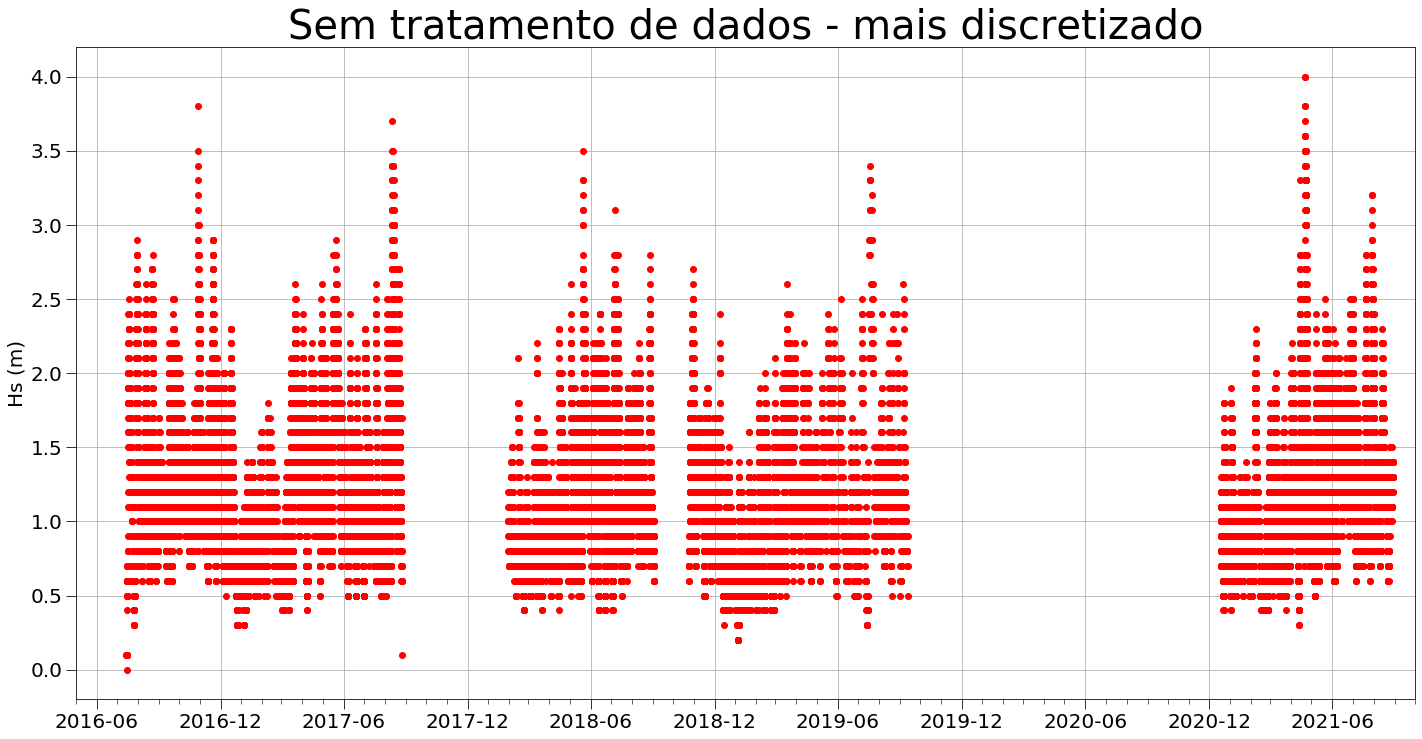

In [13]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(arredondado['Hsig'], marker = "o", color = 'r', linestyle = 'none')
ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('Sem tratamento de dados - mais discretizado', fontsize = 40)

In [ ]:
# trabalhar com a hipotese de que natureza nao da saltos
# pesquisar por eventos meteorologicos que justifiquem esses maximos